# Analyzing Product Sentiment

In [0]:
import os
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("data.csv", delimiter=",")

In [0]:
df.head(3)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5


Data pre-processing

In [0]:
df = df.fillna({'review':''})  
def remove(s):
     return s.translate(None, string.punctuation) 

df['review_new'] = df['review'].apply(remove)

In [0]:
df.head(5)

,name,review,rating,review_new
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...


In [0]:
df['feel'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [0]:
df.head(5)

,name,review,rating,review_new,feel
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...,-1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...,1


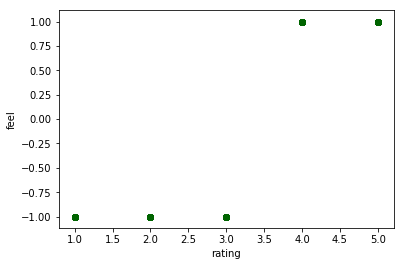

In [0]:
plt.scatter(df["rating"], df["feel"],  color='darkgreen')
plt.xlabel("rating")
plt.ylabel("feel")
plt.show()

In [0]:
import json
with open('test_data_idx.json') as test_data_file:    
    test_data_idx = json.load(test_data_file)
with open('train_data_idx.json') as train_data_file:    
    train_data_idx = json.load(train_data_file)

print train_data_idx[:3]
print test_data_idx[:3]

[0, 1, 2]
[8, 9, 14]


In [0]:

train_data = df.iloc[train_data_idx]
test_data = df.iloc[test_data_idx]
test_data.head(2)

,name,review,rating,review_new,feel
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,This has been an easy way for my nanny to reco...,1


Model

In [0]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train_data['review_new'])
test_matrix = vectorizer.transform(test_data['review_new'])

In [0]:
 gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_matrix, train_data['feel'])

In [0]:
predicted_y = gbm.predict(test_matrix)
correct_num = np.sum(predicted_y == test_data['feel'])
total_num = len(test_data['feel'])
accuracy = correct_num * 1./ total_num
print (accuracy)

0.8364230861531078


In [0]:
word_feel = ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'broke', 'less', 'even', 'waste', 'disappointed']
      
vectorizer_word_subset = CountVectorizer(vocabulary=word_feel)  
train_matrix_word_subset = vectorizer_word_subset.fit_transform(train_data['review_new'])
test_matrix_word_subset = vectorizer_word_subset.transform(test_data['review_new'])

In [0]:
gb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train_matrix_word_subset, train_data['feel'])

In [0]:
test_predicted_y = gb.predict(test_matrix_word_subset)
correct_num = np.sum(test_predicted_y == test_data['feel'])
total_num = len(test_data['feel'])
test_accuracy = correct_num * 1./ total_num
print ("simple_model test accuracy: {}".format(test_accuracy))

simple_model test accuracy: 0.785787137029


In [0]:
positive_label = len(test_data[test_data['feel']>0])
negative_label = len(test_data[test_data['feel']<0])
print "positive_label is {}, negative_label is {}".format(positive_label, negative_label)

positive_label is 25478, negative_label is 7858


In [0]:
negative_num = np.argsort(predicted_y)[:5]
print (test_scores[negative_num[0]])
test_data.iloc[negative_num]

-1


,name,review,rating,review_new,feel
44680,"QuickZip Crib Sheet Set, White",Works good to keep my toddler from pulling the...,4,Works good to keep my toddler from pulling the...,1
144348,"Philips AVENT Thermal Gel Pads, 2-Pack",I do not really understand these gel pads -- m...,2,I do not really understand these gel pads may...,-1
25939,Earlyears Fill n Fun Water Mat Toy,My 6-month old loved this while it lasted. Sh...,3,My 6month old loved this while it lasted She ...,-1
69442,Dr. Brown\'s BPA Free Polypropylene Natural Fl...,very good&#12290;But it has not started&#12290...,5,very good12290But it has not started12290Packa...,1
69468,Dr. Brown\'s BPA Free Polypropylene Natural Fl...,Used for Newborn 0 -3months with breast milk. ...,5,Used for Newborn 0 3months with breast milk T...,1


In [0]:
positive_num = np.argsort(-predicted_y)[:5]
print test_scores[positive_num[0]]
test_data.iloc[positive_idx]

1


,name,review,rating,review_new,feel
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,A friend of mine pinned this product on Pinter...,1
108173,One Step Ahead The Big Gripper Slip Proof Bath...,i have 2 kids (16 MO AND 2.5 YR) this mat is p...,5,i have 2 kids 16 MO AND 25 YR this mat is perf...,1
108169,One Step Ahead The Big Gripper Slip Proof Bath...,"i bought this because it was described as ""sof...",3,i bought this because it was described as soft...,-1
108164,Ecopiggy Orthodontic Natural Pacifier (1pk) (0...,I love this product! I try to use natural thin...,5,I love this product I try to use natural thing...,1
108159,"Bebe Dubon Soft Grip Brush and Comb Kit, Color...",We liked this set for our baby as the material...,4,We liked this set for our baby as the material...,1
